In [1]:
from pyEclipseDVH_v2 import List_txt, Load_patient, get_dmin, get_dmax, get_d_metric, Load_files_to_df
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Prescription = 36.0 # Gy

In [3]:
def diff_to_prescribed(dose, Prescribed_dose):
    return 100.0 + 100.0*(dose-Prescribed_dose)/Prescribed_dose

In [4]:
txt_files = List_txt()
txt_files

['Planned_plan_RC_export.txt', 'Replan_RC_export.txt']

In [5]:
multi_df = Load_files_to_df(txt_files)

Planned_plan_RC_export.txt loaded 	 patID:X12345 PlanID:Planned and number of structures is 6
Replan_RC_export.txt loaded 	 patID:X12345 PlanID:Replanned and number of structures is 5


In [6]:
multi_df.to_csv('All_data.csv')

For processing, drop the patID level since it is unchanged and this causes errors in my custom get_dose functions]

In [7]:
multi_df.columns = multi_df.columns.droplevel()
multi_df.head()

planID        Planned                                                    \
Structure        BODY CTV36Gy L Femoral Head PTV BLADDER R Femoral Head   
Dose (Gy)                                                                 
0.00       100.000000   100.0          100.0       100.0          100.0   
0.05        99.967853   100.0          100.0       100.0          100.0   
0.10        99.710568   100.0          100.0       100.0          100.0   
0.15        98.967167   100.0          100.0       100.0          100.0   
0.20        96.848389   100.0          100.0       100.0          100.0   

planID           Replanned                                                   
Structure Rectum   CTV36Gy L Femoral Head PTV BLADDER R Femoral Head Rectum  
Dose (Gy)                                                                    
0.00       100.0     100.0          100.0       100.0          100.0  100.0  
0.05       100.0     100.0          100.0       100.0          100.0  100.0  
0.10       100.0     100.0          100.0       100.0          100.0  100.0  
0.15       100.0     100.0          100.0       100.0          100.0  100.0  
0.20       100.0     100.0          100.0       100.0          100.0  100.0

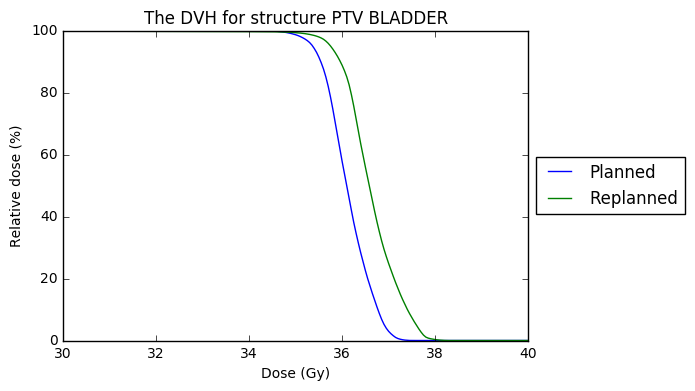

In [8]:
def plot_structure(structure, xlim):
    multi_df.xs(structure, level='Structure', axis=1).plot()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('The DVH for structure ' + structure)
    plt.ylabel('Relative dose (%)')
    plt.xlim(xlim)
    return

structure = 'PTV BLADDER'
plot_structure(structure, xlim=[30,40])

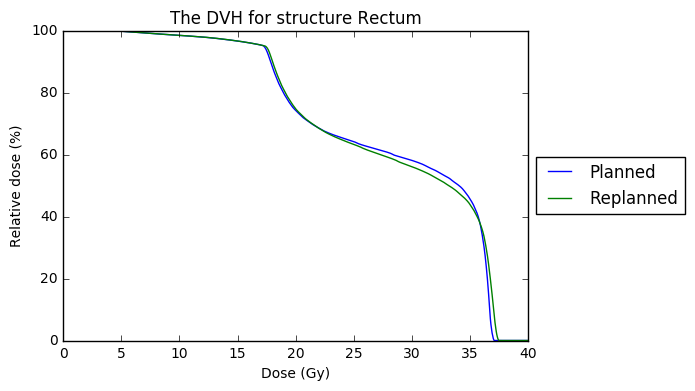

In [9]:
structure = 'Rectum'
plot_structure(structure, xlim=[0,40])

In [10]:
def d50(df):
    return diff_to_prescribed(get_d_metric(df, 50.0), Prescription)

In [11]:
d50_df = multi_df.apply(d50)    # function of form lambda function that takes a single argument

In [15]:
d50_df

planID     Structure     
Planned    BODY                2.650682
           CTV36Gy            99.967557
           L Femoral Head     61.680973
           PTV BLADDER       100.271376
           R Femoral Head     60.645708
           Rectum             94.564767
Replanned  CTV36Gy           101.221269
           L Femoral Head     61.565716
           PTV BLADDER       101.619544
           R Femoral Head     61.015640
           Rectum             92.089050
dtype: float64

In [22]:
for item in d50_df.index.values:
    print(item)

('Planned', 'BODY')
('Planned', 'CTV36Gy')
('Planned', 'L Femoral Head')
('Planned', 'PTV BLADDER')
('Planned', 'R Femoral Head')
('Planned', 'Rectum')
('Replanned', 'CTV36Gy')
('Replanned', 'L Femoral Head')
('Replanned', 'PTV BLADDER')
('Replanned', 'R Femoral Head')
('Replanned', 'Rectum')


In [25]:
d50_df[('Planned', 'CTV36Gy')]

99.967557445299192

In [26]:
d50_df[('Replanned', 'CTV36Gy')]

101.22126906797547